In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cargar los datasets
resultado14 = pd.read_csv('../data/processed/resultado14.csv')
resultado14_8_2018 = pd.read_csv('../data/processed/resultado14_8-2018.csv')

resultado14 = resultado14.drop(columns={'ao', 'UI'})
resultado14_8_2018 = resultado14_8_2018.drop(columns={'ao', 'UI'})

# Asegurarnos de que las fechas están en el formato correcto
resultado14['fecha'] = pd.to_datetime(resultado14['fecha'])
resultado14_8_2018['fecha'] = pd.to_datetime(resultado14_8_2018['fecha'])

# Crear variables de rezago en el dataset histórico
resultado14['lag1'] = resultado14['abierto/cerrado'].shift(1)
resultado14['lag2'] = resultado14['abierto/cerrado'].shift(2)
resultado14.dropna(inplace=True)

# Dividir el dataset histórico en características y etiqueta
X_train = resultado14[['lag1', 'lag2']]
y_train = resultado14['abierto/cerrado']

# Entrenar el modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Preparar las variables de rezago para las predicciones del 8 al 20 de agosto de 2018
last_lag1 = resultado14.iloc[-1]['abierto/cerrado']
last_lag2 = resultado14.iloc[-2]['abierto/cerrado']

# Realizar predicciones para los próximos 14 días
predictions = []
dates = pd.date_range(start='2018-04-08', end='2018-08-20')

for _ in range(len(dates)):
    pred = model.predict([[last_lag1, last_lag2]])[0]
    predictions.append(pred)
    last_lag2 = last_lag1
    last_lag1 = pred

# Crear un DataFrame con las predicciones
predictions_df = pd.DataFrame({'fecha': dates, 'prediccion': predictions})

# Comparar las predicciones con los datos reales
resultado14_8_2018 = resultado14_8_2018.set_index('fecha')
predictions_df = predictions_df.set_index('fecha')

comparison_df = resultado14_8_2018.join(predictions_df)
comparison_df['correcto'] = comparison_df['abierto/cerrado'] == comparison_df['prediccion']

# Calcular la precisión de las predicciones
precision = accuracy_score(comparison_df['abierto/cerrado'], comparison_df['prediccion'])

print(f'Precisión de las predicciones: {precision:.2f}')
print(comparison_df)


Precisión de las predicciones: 1.00
            abierto/cerrado  prediccion  correcto
fecha                                            
2018-08-06              0.0         0.0      True
2018-08-07              0.0         0.0      True
2018-08-08              0.0         0.0      True
2018-08-09              0.0         0.0      True
2018-08-10              0.0         0.0      True
2018-08-11              0.0         0.0      True
2018-08-12              0.0         0.0      True
2018-08-13              0.0         0.0      True
2018-08-14              0.0         0.0      True
2018-08-15              0.0         0.0      True
2018-08-16              0.0         0.0      True
2018-08-17              0.0         0.0      True
2018-08-18              0.0         0.0      True
2018-08-19              0.0         0.0      True
2018-08-20              0.0         0.0      True


C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: 

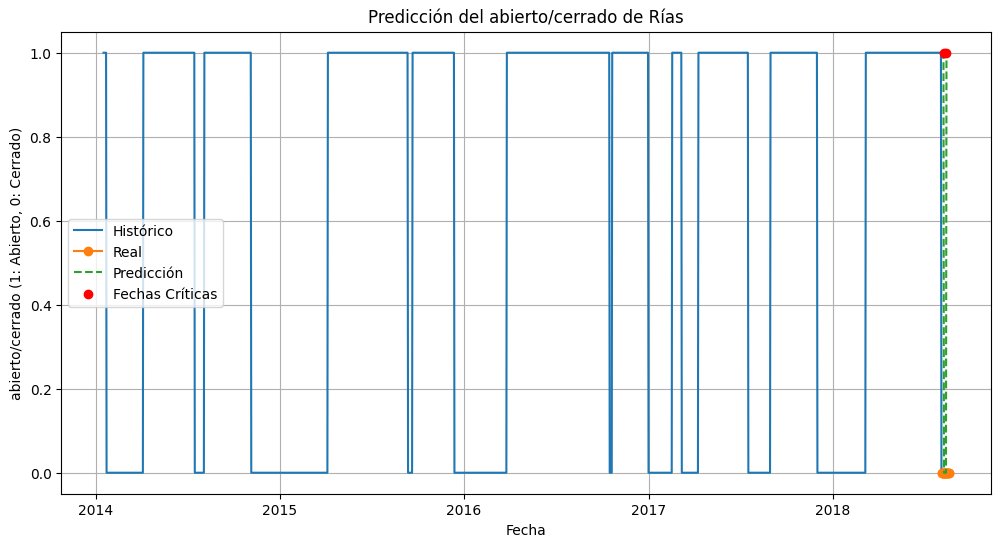

        fecha          UI  abierto/cerrado_real    ao  \
0  2018-08-06   234.12500                   0.0  63.1   
1  2018-08-07   329.55650                   0.0   0.0   
2  2018-08-08  1490.46750                   0.0   0.0   
3  2018-08-09  3252.85000                   0.0   0.0   
4  2018-08-10  4101.60000                   0.0   0.0   
5  2018-08-11   131.50250                   0.0   0.0   
6  2018-08-12   144.79025                   0.0   0.0   
7  2018-08-13  2791.95000                   0.0   0.0   
8  2018-08-14  3945.30750                   0.0   0.0   
9  2018-08-15  3138.61250                   0.0   0.0   
10 2018-08-16  8014.47500                   0.0   0.0   
11 2018-08-17  7307.40000                   0.0   0.0   
12 2018-08-18  1520.12750                   0.0   0.0   
13 2018-08-19  2281.60000                   0.0   0.0   
14 2018-08-20  1080.65000                   0.0   0.0   

    abierto/cerrado_prediccion  
0                          1.0  
1                    

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carga de los datos históricos y de los datos reales para las fechas a predecir
resultado14 = pd.read_csv('../data/processed/resultado14.csv')
resultado14_8_2018 = pd.read_csv('../data/processed/resultado14_8-2018.csv')

# Asegúrate de que las columnas 'fecha' estén en formato datetime
resultado14['fecha'] = pd.to_datetime(resultado14['fecha'])
resultado14_8_2018['fecha'] = pd.to_datetime(resultado14_8_2018['fecha'])

# Filtramos los datos históricos hasta el 5 de agosto de 2018
resultado14 = resultado14[resultado14['fecha'] <= '2018-08-05']

# Ordenamos el DataFrame por fecha
resultado14 = resultado14.sort_values(by='fecha')

# Función para calcular la probabilidad de cambio de abierto/cerrado
def calcular_probabilidad_cambio(df):
    cambios = df['abierto/cerrado'].diff().abs().sum() / len(df)
    return cambios

# Función para predecir el abierto/cerrado basado en la tendencia y la probabilidad de cambio
def predecir_abiertocerrado(df, fechas_prediccion, fechas_criticas=[]):
    ultima_fecha = df['fecha'].iloc[-1]
    ultima_abiertocerrado = df['abierto/cerrado'].iloc[-1]
    prob_cambio = calcular_probabilidad_cambio(df)
    
    predicciones = []
    for fecha_prediccion in fechas_prediccion:
        if fecha_prediccion in fechas_criticas:
            abiertocerrado_prob = 1 - ultima_abiertocerrado  # Alta probabilidad de cambio
        else:
            abiertocerrado_prob = ultima_abiertocerrado if np.random.rand() > prob_cambio else 1 - ultima_abiertocerrado
        predicciones.append((fecha_prediccion, abiertocerrado_prob))
        ultima_abiertocerrado = abiertocerrado_prob
    
    return pd.DataFrame(predicciones, columns=['fecha', 'abierto/cerrado'])

# Fechas críticas donde es probable que el abierto/cerrado cambie (pueden ajustarse según conocimiento del dominio)
fechas_criticas = [pd.to_datetime('2018-08-10'), pd.to_datetime('2018-08-15')]

# Predicción para las fechas en resultado14_8-2018
fechas_prediccion = resultado14_8_2018['fecha']
predicciones = predecir_abiertocerrado(resultado14, fechas_prediccion, fechas_criticas)

# Comparación con los valores reales
resultado_comparacion = resultado14_8_2018.merge(predicciones, on='fecha', suffixes=('_real', '_prediccion'))

# Visualización de los resultados
plt.figure(figsize=(12, 6))
plt.plot(resultado14['fecha'], resultado14['abierto/cerrado'], label='Histórico')
plt.plot(resultado_comparacion['fecha'], resultado_comparacion['abierto/cerrado_real'], label='Real', marker='o')
plt.plot(resultado_comparacion['fecha'], resultado_comparacion['abierto/cerrado_prediccion'], label='Predicción', linestyle='--')
plt.scatter(fechas_criticas, [1]*len(fechas_criticas), color='red', label='Fechas Críticas', zorder=5)
plt.xlabel('Fecha')
plt.ylabel('abierto/cerrado (1: Abierto, 0: Cerrado)')
plt.legend()
plt.title('Predicción del abierto/cerrado de Rías')
plt.grid(True)
plt.show()

# Imprimir el DataFrame de comparación para verificar resultados
print(resultado_comparacion)
